# Logistic Regression

Logistic regression is a statistical method used for binary classification, where the goal is to predict one of two possible outcomes based on one or more predictor variables. It is a type of regression analysis that estimates the probability that a given input point belongs to a certain class.

### Key Concepts of Logistic Regression

1. **Logistic Function (Sigmoid Function):**
   The core of logistic regression is the logistic function, also known as the sigmoid function, which maps any real-valued number into a value between 0 and 1. The function is defined as:
   \[
   \begin{cases} 
   \sigma(z) = \frac{1}{1 + e^{-z}}
   \end{cases}
   \]
   where \( z \) is the linear combination of the input features.

2. **Odds and Log-Odds:**
   - **Odds:** The ratio of the probability of an event occurring to the probability of it not occurring.
     \[
     \begin{cases} 
     \text{Odds} = \frac{P(Y=1)}{P(Y=0)}
     \end{cases}
     \]
   - **Log-Odds (Logit):** The natural logarithm of the odds.
     \[
     \begin{cases} 
     \text{Logit}(P) = \log\left(\frac{P}{1-P}\right)
     \end{cases}
     \]

3. **Model Equation:**
   In logistic regression, the relationship between the predictors \( X \) and the probability \( P \) of the outcome \( Y \) is modeled as:
   \[
   \begin{cases} 
   \log\left(\frac{P(Y=1|X)}{P(Y=0|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
   \end{cases}
   \]
   This can be rewritten using the logistic function as:
   \[
   \begin{cases} 
   P(Y=1|X) = \sigma(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)
   \end{cases}
   \]

4. **Training the Model:**
   The coefficients \( \beta \) are estimated using maximum likelihood estimation (MLE), which finds the values that maximize the likelihood of the observed data.

5. **Interpretation of Coefficients:**
   The coefficients in logistic regression represent the change in the log-odds of the outcome for a one-unit change in the predictor variable. They can be exponentiated to obtain the odds ratios, which are easier to interpret.

### Applications of Logistic Regression

- **Medical Field:** Predicting the presence or absence of a disease.
- **Marketing:** Predicting whether a customer will buy a product or not.
- **Finance:** Predicting loan default.

### Example in Python

Here is a basic example of logistic regression using Python's `scikit-learn` library:

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('path/to/dataset.csv')

# Features and target variable
X = data[['feature1', 'feature2', 'feature3']]  # Replace with actual feature names
y = data['target']  # Replace with actual target name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
```

This example demonstrates loading a dataset, splitting it into training and test sets, training a logistic regression model, making predictions, and evaluating the model's performance.

## Importing the libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [60]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [61]:
X.shape
print(X[:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [62]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [64]:
print(X_train.shape)

(300, 2)


In [65]:
print(y_train.shape)

(300,)


In [66]:
print(X_test.shape)

(100, 2)


In [67]:
print(y_test.shape)

(100,)


## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
print(X_train[:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


In [70]:
print(X_test[:5])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


## Training the Logistic Regression model on the Training set

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [72]:
print(classifier.predict(sc.transform([[47,49000]])))

[1]


## Predicting the Test set results

In [73]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
np.savetxt("data3.csv", np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),  
            delimiter = ",")

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

## Visualising the Training set results

<>:10: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:10: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?


MemoryError: Unable to allocate 1.01 GiB for an array with shape (135904000,) and data type int64

## Visualising the Test set results

ValueError: '#7fc97f' is not a valid color value.

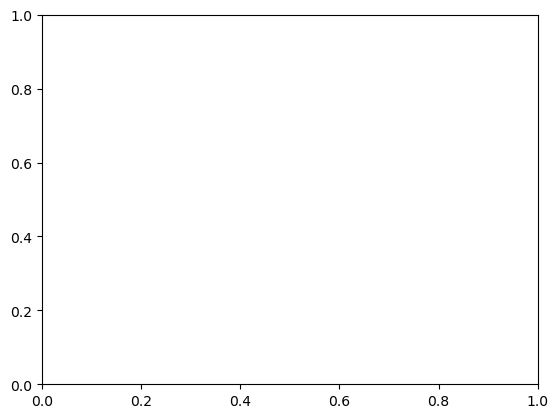

In [80]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('#7fc97f', '#ffff99')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('#7fc97f', '#ffff99'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()